In [22]:
#단어 수준의 원-핫 인코딩(간단한 예):

import numpy as np

# 초기 데이터: 각 원소가 샘플
# (이 예에서 하나의 샘플이 하나의 문장이다. 하지만 문서 전체가 될 수도 있다)
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 데이터에 있는 모든 토큰의 인덱스를 구축.
token_index = {}
for sample in samples:
    # split() 메서드를 사용해 샘플을 토큰으로 나눈다.
    # 실전에서는 구둣점과 특수 문자도 사용.
    for word in sample.split():
        if word not in token_index:
            # 단어마다 고유한 인덱스를 할당.
            token_index[word] = len(token_index) + 1
            # 인덱스 0은 사용하지 않는다.

# 샘플을 벡터로 변환.
# 각 샘플에서 max_length 까지 단어만 사용.
max_length = 10

# 결과를 저장할 배열
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [23]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [24]:
token_index

{'The': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'the': 5,
 'mat.': 6,
 'dog': 7,
 'ate': 8,
 'my': 9,
 'homework.': 10}

In [25]:
# 케라스를 사용한 단어 수준의 원-핫 인코딩:

from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000) # 가장 빈도가 높은 1,000개의 단어만 선택하도록 Tokenizer 객체를 만든다.
tokenizer.fit_on_texts(samples) # 단어 인덱스를 구축

sequences = tokenizer.texts_to_sequences(samples) # 문자열을 정수 인덱스의 리스트로 변환

# 직접 원-핫 이진 벡터 표현을 얻을 수 있다.
# 원-핫 인코딩 외에 다른 벡터화 방법도 제공한다.
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# 계산된 단어 인덱스를 구한다.
word_index = tokenizer.word_index

print(word_index)


{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


In [26]:
one_hot_results[0:2,:10]

array([[0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 1., 1., 1.]])

## `Embedding` 층을 사용해 단어 임베딩 학습하기

- 단어와 밀집 벡터를 연관짓는 가장 간단한 방법은 랜덤하게 벡터를 선택하는 것이다.
- 이 방식의 문제점은 임베딩 공간이 구조적이지 않다는 것입니다. 
- 예를 들어 accurate와 exact 단어가 대부분 문장에서 비슷한 의미로 사용되지만 완전히 다른 임베딩을 가진다. 
- 심층 신경망이 이런 임의의 구조적이지 않은 임베딩 공간을 이해하기는 어렵다.
- 단어 벡터 사이에 조금 더 추상적이고 기하학적인 관계를 얻으려면 단어 사이에 있는 의미 관계를 반영해야 한다.
- 단어 임베딩은 언어를 기하학적 공간에 매핑하는 것이다. 
- 예를 들어 잘 구축된 임베딩 공간에서는 동의어가 비슷한 단어 벡터로 임베딩될 것이다.
- 일반적으로 두 단어 벡터 사이의 거리(L2 거리)는 이 단어 사이의 의미 거리와 관계되어 있다(멀리 떨어진 위치에 임베딩된 단어의 의미는 서로 다르고 반면 비슷한 단어들은 가까이 임베딩된다). 
- 거리외에 임베딩 공간의 특정 방향도 의미를 가질 수 있다.

- 실제 단어 임베딩 공간에서 의미 있는 기하학적 변환의 일반적인 예는 '성별' 벡터와 '복수(plural)' 벡터ㅇ이다. 
- 예를 들어 'king' 벡터에 'female' 벡터를 더하면 'queen' 벡터가 된다. 'plural' 벡터를 더하면 'kings'가 된다. 
- 단어 임베딩 공간은 전형적으로 이런 해석 가능하고 잠재적으로 유용한 수천 개의 벡터를 특성으로 가진다.
- 사람의 언어를 완벽하게 매핑해서 어떤 자연어 처리 작업에도 사용할 수 있는 이상적인 단어 임베딩 공간은 아직 가능하지 않다. 사람의 언어에도 그런 것은 없다. 
- 세상에는 많은 다른 언어가 있고 언어는 특정 문화와 환경을 반영하기 때문에 서로 동일하지 않다. 
- 실제로 좋은 단어 임베딩 공간을 만드는 것은 문제에 따라 크게 달라진다. - 영어로 된 영화 리뷰 감성 분석 모델을 위한 완벽한 단어 임베딩 공간은 영어로 된 법률 문서 분류 모델을 위한 완벽한 임베딩 공간과 다를 것 이다. 특정 의미 관계의 중요성이 작업에 따라 다르기 때문이다.
- 따라서 새로운 작업에는 새로운 임베딩을 학습하는 것이 타당하다. 
- 다행히 역전파를 사용해 쉽게 만들 수 있고 케라스를 사용하면 더 쉽다. `Embedding` 층의 가중치를 학습하면 된다.

IMDB 영화 max 감성 예측 
- max_feature = 10,000개
- max_len = 20개 
- 이 네트워크는 10,000개의 단어에 대해 8 차원의 임베딩을 학습하여 정수 시퀀스 입력(2D 정수 텐서)를 임베딩 시퀀스(3D 실수형 텐서)로 바꿀 것입니다. 
- 그 다음 이 텐서를 2D로 펼쳐서 분류를 위한 `Dense` 층을 훈련하겠습니다.

In [29]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

# 특성으로 사용할 단어의 수
max_features = 10000
# 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용)
maxlen = 20

# 정수 리스트로 데이터를 로드.
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features)

# 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환.
# pad_sequences 길이를 맞춰 줄 때 사용.
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [30]:
x_train[0]

array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32], dtype=int32)

In [31]:
x_test.shape

(25000, 20)

In [32]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
# 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 Embedding 층에 input_length를 지정한다.
model.add(Embedding(10000, 8, input_length=maxlen))
# Embedding 층의 출력 크기는 (samples, maxlen, 8)가 된다.

# 3D 임베딩 텐서를 (samples, maxlen * 8) 크기의 2D 텐서로 펼친다.
model.add(Flatten())

# 분류기를 추가.
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 4s 3ms/step - loss: 0.6771 - acc: 0.5983 - val_loss: 0.6363 - val_acc: 0.6914
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5559 - acc: 0.7479 - val_loss: 0.5330 - val_acc: 0.7286
Epoch 3/10
625/625 [==============================] 

In [33]:
# 원본 IMDB 텍스트 zipfile 불러오기
import zipfile

zf = zipfile.ZipFile('/content/drive/MyDrive/강의/m9_딥러닝 기본/dataset/aclImdb.zip')
zf.extractall()
zf.close()

In [34]:
!ls ./aclImdb/train

neg  pos  urls_neg.txt	urls_pos.txt


In [35]:
# 훈련용 리뷰 하나를 문자열 하나로 만들어 훈련 데이터를 문자열의 리스트로 구성해보기. 
# 리뷰 레이블(긍정/부정)도 labels 리스트로 만들기.
import os

imdb_dir = './aclImdb'
train_dir = os.path.join(imdb_dir,'train')

labels = []
texts = []

for label_type in ['neg','pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname), encoding='utf8')
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [36]:
texts[0]


'For the big thinkers among us, "The Intruder" is a maddeningly incoherent movie from France that gives so-called "art films" a bad name. The story is something about a bitter old coot, Louis Trebor (Michel Subor), who goes searching in Tahiti for a heart transplant, but beyond that, I have no idea who any of the people in the movie were or why they were doing what they were doing. With no coherent storyline to boast of, the movie loses us early on, though I\'m perfectly willing to admit that there might be SOMEBODY out there who actually gets some deep message out of this film. <br /><br />This muddled, snail-paced drama runs a full two hours and five minutes - though I seriously doubt anyone with any kind of a life will still be hanging around by the closing credits.'

In [37]:
 ## 데이터 토큰화
 # 다음과 같이 훈련 데이터를 처음 200개의 샘플로 제한.
 # 이 모델은 200개의 샘플을 학습한 후에 영화 리뷰를 분류할 것이다.

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # 100개 단어 이후는 버립니다.
training_samples = 200 # 훈련 샘플은 200개
validation_samples = 10000 # 검증 샘플은 10,000개
max_words = 10000 # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용한다.

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts) # 문자 데이터를 입력받아서 리스트의 형태고 변환
sequences = tokenizer.texts_to_sequences(texts) # 텍스트 안의 단어들을 숫자의 시퀀스의 형태로 변환

word_index = tokenizer.word_index
print(len(word_index)) # 고유한 토큰 개수

data = pad_sequences(sequences,maxlen=maxlen)

labels = np.asarray(labels)
print(data.shape) # 데이터 텐서의 크기
print(labels.shape) # 레이블 텐서의 크기

88582
(25000, 100)
(25000,)


In [38]:
# 데이터를 훈련 세트와 검증 세트로 분할합니다.
# 샘플이 순서대로 있기 때문에 (부정 샘플이 모두 나온 후에 긍정 샘플이 옵니다.) 
# 먼저 데이터를 섞습니다.
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples+validation_samples]
y_val = labels[training_samples:training_samples+validation_samples]

In [39]:
## 임베딩 전처리
# 파일(.txt 파일)을 파싱하여 단어(즉 문자열)와 이에 상응하는 벡터 표현(즉 숫자 벡터)를 매핑하는 인덱스를 생성.

glove_dir = '/content/drive/MyDrive/강의/m9_딥러닝 기본/dataset'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'),encoding='utf8')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:],dtype='float32')
  embeddings_index[word] = coefs
f.close()

print(len(embeddings_index))

400000


In [40]:
# Embedding 층에 주입할 수 있도록 임베딩 행렬 생성.
embedding_dim = 100
embedding_matrix = np.zeros((max_words,embedding_dim)) # 행렬의 크기
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if i < max_words:
    if embedding_vector is not None:
      # 임베딩 인덱스에 없는 단어는 모두 0이 됩니다.
      embedding_matrix[i] = embedding_vector

In [41]:
embeddings_index.get('the')

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [42]:
print(embedding_matrix.shape)

(10000, 100)


In [43]:
## 모델 정의하기
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words,embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 32)                320032    
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [44]:
# 모델에 GloVe 임베딩 로드하기
# embedding 층 동결
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [45]:
# 모델 훈련과 평가
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train,y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val,y_val))

Epoch 1/10
7/7 [==============================] - 1s 112ms/step - loss: 1.4227 - acc: 0.4600 - val_loss: 0.8536 - val_acc: 0.4981
Epoch 2/10
7/7 [==============================] - 1s 93ms/step - loss: 0.6826 - acc: 0.6000 - val_loss: 0.7236 - val_acc: 0.5128
Epoch 3/10
7/7 [==============================] - 1s 91ms/step - loss: 0.4430 - acc: 0.8100 - val_loss: 0.8535 - val_acc: 0.5027
Epoch 4/10
7/7 [==============================] - 1s 91ms/step - loss: 0.3816 - acc: 0.8600 - val_loss: 0.7500 - val_acc: 0.5282
Epoch 5/10
7/7 [==============================] - 1s 93ms/step - loss: 0.2614 - acc: 0.9700 - val_loss: 0.7239 - val_acc: 0.5436
Epoch 6/10
7/7 [==============================] - 1s 94ms/step - loss: 0.2923 - acc: 0.8900 - val_loss: 0.7882 - val_acc: 0.5399
Epoch 7/10
7/7 [==============================] - 1s 94ms/step - loss: 0.1889 - acc: 0.9750 - val_loss: 0.7263 - val_acc: 0.5581
Epoch 8/10
7/7 [==============================] - 1s 92ms/step - loss: 0.1237 - acc: 0.9900 - va

In [46]:
model.save_weights('drive/MyDrive/강의/m9_딥러닝 기본/pre_trained_glove_model.h5')

In [47]:
model.load_weights('drive/MyDrive/강의/m9_딥러닝 기본/pre_trained_glove_model.h5')

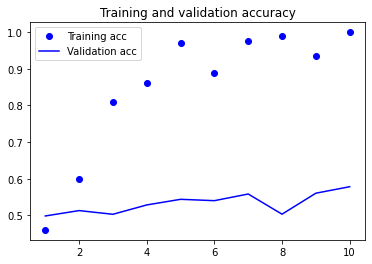

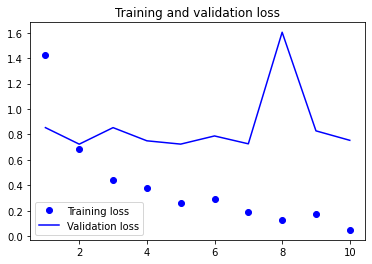

In [48]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()